In [1]:
!pip install control


  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403208 sha256=b70917e73b8c088ce9584987db553f96728384b5512d41963e681b8689b583fb
  Stored in directory: c:\users\bruno\appdata\local\pip\cache\wheels\0e\30\4c\9d0c68ffa4a90fcd19763ae99ae32215b3ef7b39b094ec0a2d
Successfully built control


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import numpy as np
import datetime
from scipy.optimize import curve_fit
from scipy.signal import TransferFunction, lti
import control
import plotly.express as px

## Data Import

In [4]:
data = pd.read_csv('motor speed data--step 0,2--sample_rate 0,1s.csv', sep=',')
data = data[['tempo', 'velocidade']]
display(data)
data.dtypes

,tempo,velocidade
0,0.1,0.0
1,0.2,30.0
2,0.3,30.0
3,0.4,60.0
4,0.5,60.0
...,...,...
95,9.6,180.0
96,9.7,270.0
97,9.8,210.0
98,9.9,180.0


tempo         float64
velocidade    float64
dtype: object

## Funções

In [5]:
def time_zero(data):
  time_list = []
  for i in range(len(data)):
    if i == 0:
      time_list.append(0)
    else:
      dif = (data[i] - data[0]).total_seconds()
      time_list.append(dif)
  return time_list

In [23]:
def first_order_tf_control(x, k, tau):
  num = np.array([k])
  den = np.array([tau, 1])

  h = control.tf(num, den)
  t, y = control.step_response(h, T=x)

  return y

In [7]:
def first_order_tf_control_deadtime(x, k, tau, teta):
  N = 20
  teta = abs(teta)
  num = np.array([k])
  den = np.array([tau, 1]) # [(tau*s + 1)]
  h1 = control.tf(num, den)

  print('H: ')
  print(h1)
  print('\n')

  [num_pade, den_pade] = control.pade(teta, N)
  h_pade = control.tf(num_pade, den_pade)
  print('Padè Aprox:')
  print(h_pade)

  H = control.series(h1, h_pade)

  t, y = control.step_response(H, T=x)

  return y

In [8]:
def second_order_tf_control(x, k, tau1, tau2, teta):
    teta = abs(teta)
    num = np.array([k])
    den = np.array([tau1*tau2, tau1 + tau2, 1]) # [(tau1*s, 1) * (tau2*s, 1)]
    h1 = control.tf(num, den)
    print(h1)

    t, y = control.step_response(H, T=x)

    return y

In [9]:
def second_order_tf_control_deadtime(x, k, tau1, tau2, teta):
  N = 4
  teta = abs(teta)
  num = np.array([k])
  den = np.array([tau1*tau2, tau1 + tau2, 1]) # [(tau1*s, 1) * (tau2*s, 1)]
  h1 = control.tf(num, den)

  print('H: ')
  print(h1)
  print('\n')

  [num_pade, den_pade] = control.pade(teta, N) # teta1 e teta
  h_pade = control.tf(num_pade, den_pade)
  print('Padè Aprox:')
  print(h_pade)

  H = control.series(h1, h_pade)

  t, y = control.step_response(H, T=x)

  return y

In [10]:
def integrator(x, k):
  num = np.array([k])
  den = np.array([1, 0]) # [s]

  H = control.tf(num, den)
  t, y = control.step_response(h, T=x)
  
  return y

In [11]:
def integrator_deadtime(x, k, teta):
  N = 4
  num = np.array([k])
  den = np.array([1, 0])

  h1 = control.tf(num, den)
  [num_pade, den_pade] = control.pade(teta, N) # teta1 e teta
  h_pade = control.tf(num_pade, den_pade)
  print('Padè Aprox:')
  print(h_pade)

  H = control.series(h1, h_pade)

  t, y = control.step_response(H, T=x)
  
  return y

In [12]:
def transfer(k, tau):
  num = np.array([k])
  den = np.array([tau, 1, 0]) # [(tau*s, 1) * s]

  h = control.tf(num, den)
  print(h)
  t, y = control.step_response(h)

  return y

In [13]:
def transfer_deadtime(k, tau):
  N = 4
  num = np.array([k])
  den = np.array([tau, 1, 0]) # [(tau*s, 1) * s]
  h1 = control.tf(num, den)

  print('H: ')
  print(h1)
  print('\n')

  [num_pade, den_pade] = control.pade(teta, N)
  h_pade = control.tf(num_pade, den_pade)
  print('Padè Aprox:')
  print(h_pade)

  H = control.series(h1, h_pade)

  t, y = control.step_response(H)

  plt.plot(t, y)
  plt.show()

## Teste FIT

[0.6]
[240.3   1. ]

    0.6
-----------
240.3 s + 1

lenth 100


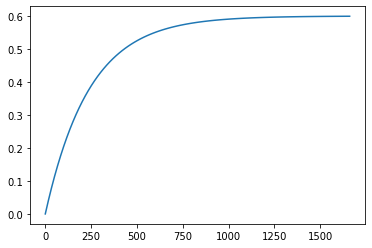

In [14]:
# TESTE.....

k = 0.6
t = 240.3

num = np.array([k])
print(num)
den = np.array([t, 1])
print(den)

h = control.tf(num, den)
print(h)
t, y = control.step_response(h)
print('lenth', len(y))

plt.plot(t, y)
plt.show()


            0.6
---------------------------
7.209e+04 s^2 + 540.3 s + 1



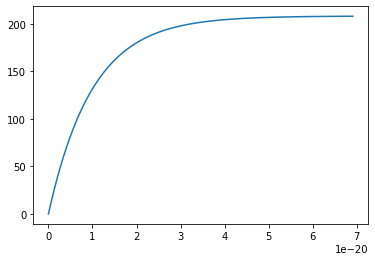

In [138]:
# TESTE.....

k = 0.6
tau1 = 240.3
tau2 = 300
teta = 30

teta = abs(teta)
num = np.array([k])
den = np.array([tau1*tau2, tau1 + tau2, 1]) # [(tau1*s, 1) * (tau2*s, 1)]
h1 = control.tf(num, den)
print(h1)

t, y = control.step_response(h)

plt.plot(t, y)
plt.show()


   3
-------
4 s + 1



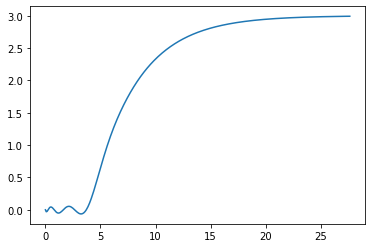

In [15]:
# TESTE.....

N = 5
tau = 4
k = 3
teta = 4

num = np.array([k])
den = np.array([tau, 1])
h1 = control.tf(num, den)

[num_pade, den_pade] = control.pade(teta, N)
h_pade = control.tf(num_pade, den_pade)

H = control.series(h1, h_pade)
print(h1)

t, y = control.step_response(H)
plt.plot(t, y)
plt.show()

H: 

        1.056
----------------------
1.255 s^2 + 2.24 s + 1



Padè Aprox:

s^4 - 8.803 s^3 + 34.87 s^2 - 71.63 s + 63.06
---------------------------------------------
s^4 + 8.803 s^3 + 34.87 s^2 + 71.63 s + 63.06



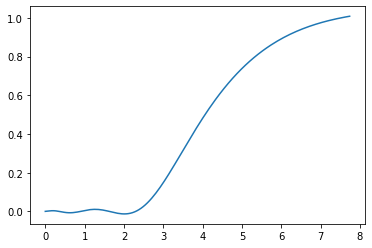

In [16]:
N = 4
k = 1.056
teta = 2.2719
tau1 = 1.1203
tau2 = 1.1202

num = np.array([k])
den = np.array([tau1*tau2, tau1 + tau2, 1]) # [(tau1, 1) * (tau2, 1)]
h1 = control.tf(num, den)

print('H: ')
print(h1)
print('\n')

[num_pade, den_pade] = control.pade(teta, N) # teta1 e teta
h_pade = control.tf(num_pade, den_pade)
print('Padè Aprox:')
print(h_pade)

H = control.series(h1, h_pade)

t, y = control.step_response(H)

plt.plot(t, y)
plt.show()

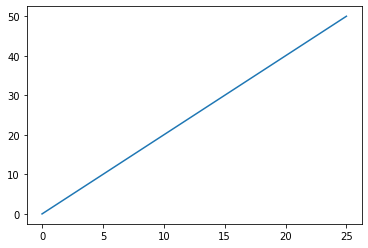

In [17]:
k = 2

num = np.array([k])
den = np.array([1, 0])

h = control.tf(num, den)
t, y = control.step_response(h)

plt.plot(t, y)
plt.show()

Padè Aprox:

s^4 - 17.86 s^3 + 143.5 s^2 - 597.9 s + 1068
--------------------------------------------
s^4 + 17.86 s^3 + 143.5 s^2 + 597.9 s + 1068



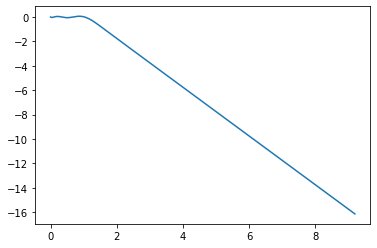

In [18]:
N = 4
k = -2
teta = 1.120

num = np.array([k])
den = np.array([1, 0])

h1 = control.tf(num, den)
[num_pade, den_pade] = control.pade(teta, N) # teta1 e teta
h_pade = control.tf(num_pade, den_pade)
print('Padè Aprox:')
print(h_pade)

H = control.series(h1, h_pade)

t, y = control.step_response(H)

plt.plot(t, y)
plt.show()


     0.6
-------------
240.3 s^2 + s



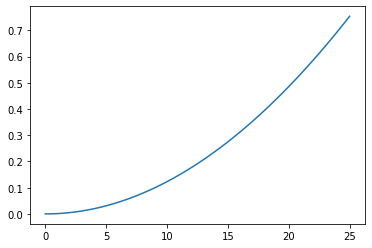

In [19]:
k = 0.6
tau = 240.3

num = np.array([k])
den = np.array([tau, 1, 0]) # [(tau*s, 1) * s]

h = control.tf(num, den)
print(h)
t, y = control.step_response(h)

plt.plot(t, y)
plt.show()

H: 

     0.6
-------------
240.3 s^2 + s



Padè Aprox:

s^4 - 4 s^3 + 7.2 s^2 - 6.72 s + 2.688
--------------------------------------
s^4 + 4 s^3 + 7.2 s^2 + 6.72 s + 2.688



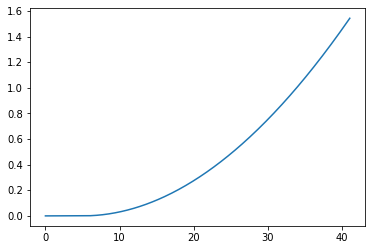

In [51]:
k = 0.6
tau = 240.3
teta = 5
N = 4

num = np.array([k])
den = np.array([tau, 1, 0]) # [(tau*s, 1) * s]

h1 = control.tf(num, den)

print('H: ')
print(h1)
print('\n')

[num_pade, den_pade] = control.pade(teta, N) # teta1 e teta
h_pade = control.tf(num_pade, den_pade)
print('Padè Aprox:')
print(h_pade)

H = control.series(h1, h_pade)

t, y = control.step_response(H)

plt.plot(t, y)
plt.show()

# Modelar Motor
- Sabe-se que o valor do step é de 0.2 [seus valores variam de 0.0 a 1.0]
- Então será feito um array com o valor de 0.2

In [14]:
step = np.ones(data['tempo'].shape[0]) * 0.2
print(step)

[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
  go.Scatter(x=data['tempo'], y=step, name="STEP VALUES"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data['tempo'], y=data['velocidade'], name="SIGNAL VALUES"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="STEP x ORIGINAL SIGNAL"
)

# Set x-axis title
fig.update_xaxes(title_text="time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>STEP</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>ORIGINAL SIGNAL</b>", secondary_y=True)

fig.show()

In [25]:
param = curve_fit(first_order_tf_control, data['tempo'], data['velocidade'])
print('\n')
print('K: ', param[0][0])
print('τ: ', param[0][1])



K:  208.09349060768992
τ:  0.518071097684443


In [17]:
k = 208.09349060768992
tau = 0.518071097684443

num = np.array([k])
print(num)
den = np.array([tau, 1])
print(den)

h = control.tf(num, den)
print(h)
t, y = control.step_response(h, T=data['tempo'])

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
  go.Scatter(x=data['tempo'], y=data['velocidade'], name="ORIGINAL"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data['tempo'], y=y, name="MODEL"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data['tempo'], y=step, name="STEP"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Step X Original/Model Signal"
)

# Set x-axis title
fig.update_xaxes(title_text="time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Step Response</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Step Value</b>", secondary_y=True)

fig.show()

[208.09349061]
[0.5180711 1.       ]

   208.1
------------
0.5181 s + 1



### NOTA: A BIBLIOTECA CONTROL DO PYTHON CONSIDERA QUE TODOS OS STEPS SÃO DE MÓDULO 1.0, LOGO O VALOR DE K, FOI ESTIMADO COMO SE A ENTRADA FOSSE UM DEGRAU UNITÁRIO, MAS PODE-SE CORRIGIR ISSO DIVIDINDO O VALOR DE K ENCONTRADO POR 0.2.

In [5]:
k = 208.09349060768992 / 0.2
tau = 0.518071097684443

num = np.array([k])
den = np.array([tau, 1])

h = control.tf(num, den)
print('Função Tranferência de 1° ordem do motor DC:')
print(h)

Função Tranferência de 1° ordem do motor DC:

    1040
------------
0.5181 s + 1

